# <p style="padding:10px;background-color:#e0301e;margin:0;color:#FFFFFF;font-family:newtimeroman;text-align:center;border-radius:8px;overflow:hidden;font-weight:500;font-size:28px;">📈 CUSTOMER CHURN PREDICTION 📉</p>


<center> <img src="https://i.ibb.co/5cq4fQz/CHURN-IMAGESS.jpg" > </center>

# <span style="font-family:serif; font-size:24px;">Table of Contents</span>

1. [Introduction](#1)
    * [What is Customer Churn?](#2)
    * [How to address and reduce Customer Churn?](#3)
    * [Objectives in this Analysis](#4)
2. [Loading libraries and Dataset](#5)
3. [Interpreting the Dataset](#6)
4. [Data Cleaning](#8)
5. [Visualizing the Data](#7)
6. [Data Preprocessing](#10)
   * [Scaling and Standardizing Numerical Features](#111)
7. [Machine Learning Model Evaluations and Predictions](#11)
   * [Random Forest](#103)
8. [Conclusion](#15)

<a id = "1" ></a>
# <span style="font-family:Georgia, serif; font-size:28px;"> 1. Introduction</span>
<a id = "introduction" ></a>

<a id = "2" ></a>
<span style="font-family:Georgia, serif; font-size:22px;">Customer Churn</span>
<br>
<span style="font-family:Georgia, serif; font-size:15px;">
Customer churn, also known as customer attrition,is when a customer chooses to stop using products or services of a company. But with each customer who churns, there are usually early indicators or metrics that can have been uncovered with churn analysis.</span>

- <span style="font-family:Georgia, serif; font-size:15px;"> For example, The Telecom Industry faces a lot of Churn(With annual churn rate of 15-25%) because the customers can choose from a variety of service providers and actively switch from existing to another.</span>


- <span style="font-family:Georgia, serif; font-size:15px;">  While looking at both Business operational insights (e.g. declining repeat purchases, reduced purchase quantity) and Customer experience insights along the customer feedbacks is foundational in order to predict churn. A scenario where a customer who has declined in recent visits and gives a feedback score of 6 of 10 after their latest shopping experience, could have an increased probability of churning.</span>

- <span style="font-family:Georgia, serif; font-size:15px;">  Generally in a business perspective it costs more to acquire new customers than it does to retain existing customers. In fact, an increase in customer retention of just 5% can create at least a 25% increase in profit. This is because returning customers will likely spend 60% more on a company's products and services. As a result, the company can spend less on the operating costs of having to acquire new customers by spending time and money on convincing an existing customer to select your company over competitors because they've already made their mind.</span>

- <span style="font-family:Georgia, serif; font-size:15px;">  However, if a company could forecast why and which customers are likely to leave ahead of time, it can focus on customer retention efforts only on these "high risk" clients. This helps in achieving the goal of expanding its customer base and retrieve more customers loyalty. </span>


<a id="churn"></a>
<a id = "3" ></a>
<span style="font-family:Georgia, serif; font-size:22px;">How to address and reduce Customer Churn?</span>


<span style="font-family:Georgia, serif; font-size:15px;"> To reduce customer churn, Companies need to predict which customers are at high risk of churn.</span>

- <span style="font-family:Georgia, serif; font-size:15px;">  To detect early signs of potential churn, insight generation of customers and their interactions across numerous channels, including store visits, product purchase history, customer service calls, Web-based transactions, and social media interaction. </span>

- <span style="font-family:Georgia, serif; font-size:15px;">  By providing solution for churn, businesses can preserve their market position,and also grow and thrive with more customers network, the lower the cost of initiation and the larger the profit.</span>


<a id = "4" ></a>
<span style="font-family:Georgia, serif; font-size:22px;">Objectives in this Analysis</span>
<br>
<br>
<span style="font-family:Georgia, serif; font-size:15px;"> Objective is to find solutions and suggestions for any possible churning </span>
- <span style="font-family:Georgia, serif; font-size:15px;">What is the percentage of Customers who are with the active services and Customers who Churn ?
    <br>
- <span style="font-family:Georgia, serif; font-size:15px;"> Does gender play a role in Customers Churn ?</span>
    <br>
- <span style="font-family:Georgia, serif; font-size:15px;"> Does the type of service provided leads to more/less Customers Churn?</span>
    <br>
- <span style="font-family:Georgia, serif; font-size:15px;"> What's the most profitable service types?</span>
    <br>
- <span style="font-family:Georgia, serif; font-size:15px;"> Profitable features and services by the company? </span>
<a id="objective"></a>


time for which existing customers are associated with a company



___

<a id = "5" ></a>
# <span style="font-family:Georgia, serif; font-size:28px;"> 2. Loading libraries and data</span>
<a id="loading"></a>

<span style="font-family:Georgia, serif; font-size:20px;"> Basic Imports</span>

In [34]:
import pandas as pd #manipulation
import numpy as np  #numerical python
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots #visualization
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.preprocessing import StandardScaler  #for rescaling the data
from sklearn.preprocessing import LabelEncoder #encoding
from sklearn import metrics
#from sklearn.metrics import roc_curve
#from sklearn.metrics import recall_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import*  #if you want to import all the metric use *

<span style="font-family:Georgia, serif; font-size:20px;"> Dataset Import</span>

In [36]:
#loading data
df = pd.read_csv('/content/customer_churn.csv')


___

<a id = "6" ></a>
# <span style="font-family:Georgia, serif; font-size:28px;"> 3. Interpreting the Dataset</span>
<a id = "Undertanding the data" ></a>

In [37]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**So, In this Telecom Company's Data we have,**
*  **Churn Column** - *Customers who left recently*

* **Services provided by the company to its customer** – *phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies*

* **Customer's Information Columns** - *Old/New Customer and their Active Period, contract, payment method, paperless billing, monthly charges, and total charges*

* **Customer's Demographic Columns** – *gender, age range, and if they have partners and dependents*

In [38]:
df.shape

(7043, 21)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [41]:
a=''

In [42]:
type(a)

str

In [43]:
id(a)  #unique location

137081384910896

In [44]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [45]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


***
<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Data Cleaning </span>
<a id = "8" ></a>

In [46]:
df.duplicated().sum()

0

In [47]:
#Since, we don't need customerID, We drop the column
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
#Converting Object column to Numerical Column, which is actually holds Numerical data
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')  #error=raise--raised the,ignore=ignore the error,coerce=any black or unusual value he will make NA.
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [49]:
# Fillna with mean values
df.fillna(df["TotalCharges"].mean())

#or

#Removing missing values
#df.dropna(inplace = True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [50]:
#Removing tenure equal to 0
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [51]:
df.shape

(7032, 20)

In [52]:
#Categorizing Senior Citizen column for encoding
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})  #for making more easy for client
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
#TO CHECK THE details of my numeric data

In [54]:
#Finding any absurd values in Numeric Columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [55]:
df.describe(include='O')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [56]:
#Creating Dataframe for correlation plot
df2 = df
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df2) #creating a dummy data alternative of onehot encondiing librarty
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

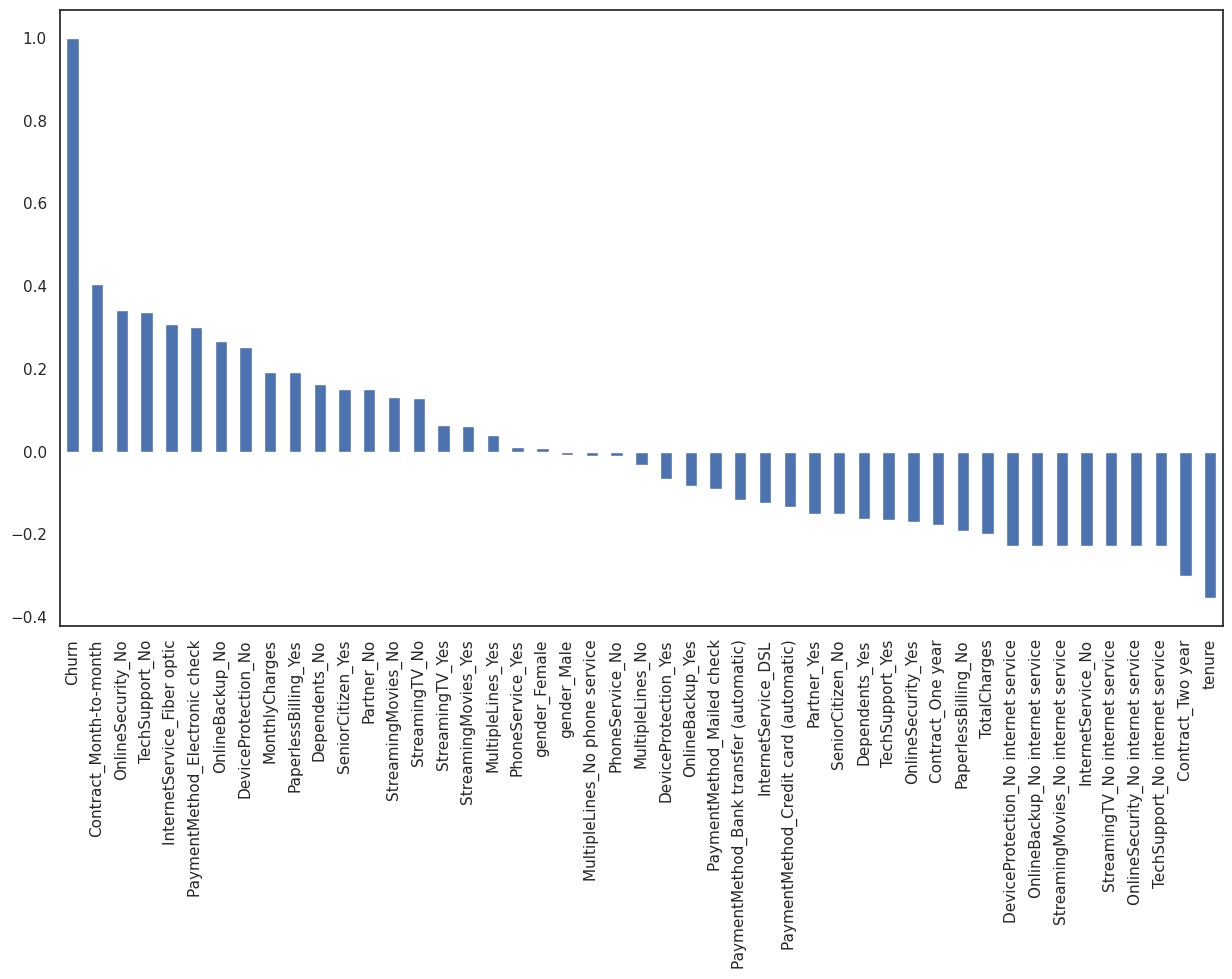

In [57]:
#Correlation of "Churn" with Features:
plt.figure(figsize=(15,8))
sns.set(style = 'white')

df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

___

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualizing The Data </span>
<a id = "missingvalue" ></a>

<span style="font-family:serif; font-size:23px;"> Gender Spread and Churn Distribution </span>


In [58]:
df['gender'].value_counts()

,count
gender,
Male,3549
Female,3483


In [59]:
import pandas as pd


In [60]:
!pip install sweetviz

In [61]:
import sweetviz as sv

In [62]:
#df = pd.read_csv('/content/customer_churn.csv')

In [63]:
report = sv.analyze(df)
report.show_html('harsh_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report harsh_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [64]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [65]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [66]:
AV = AutoViz_Class()
report = AV.AutoViz(df)

Shape of your Data Set loaded: (7032, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  6
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    20 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 22 d

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
gender,object,0.000000,0,,,No issue
SeniorCitizen,object,0.000000,0,,,No issue
Partner,object,0.000000,0,,,No issue
Dependents,object,0.000000,0,,,No issue
tenure,int64,0.000000,1,1.000000,72.000000,Column has a high correlation with ['TotalCharges']. Consider dropping one of them.
PhoneService,object,0.000000,0,,,No issue
MultipleLines,object,0.000000,0,,,No issue
InternetService,object,0.000000,0,,,No issue
OnlineSecurity,object,0.000000,0,,,No issue
OnlineBackup,object,0.000000,0,,,No issue


Number of All Scatter Plots = 3
All Plots done
Time to run AutoViz = 18 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


* Eventhough there's a small fraction of customers but it's better to point out as they are more likely to churn because don't have a phone service.

---
<a id = "4" ></a>
<span style="font-family:Georgia, serif; font-size:24px;"><b> Conclusions as a Data Analyst :</b></span>
<span style="font-family:Georgia, serif; font-size:18px;">
    <br>
     ● 75% of customer who have Month-to-Month Contract have opted to move out as compared to 13% of customers  who have signed One Year Contract and 3% of customers  who have signed Two Year Contract.
    <br>
     ● Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.
    <br>
     ● Fiber optic service which was choosen by a lot of customers and it's evident that there's high churn rate among these customers. This could expose an issue in the Fiber optic service which dissatisfied most of it's customers, further looking into the issue might find a better and apt solution.
    <br>
     ● Customers who opted for DSL service are larger in number and is found to have less churn rate compared to Fibre optic service
    <br>
     ● Customers without dependents and customers who have partners are more likely to churn while senior citizens being the most of churn.
    <br>
     ● The absence of online security, Paperless Billing system and services with no TechSupport were the similiar trend are of the customers who are most likely churn.
    <br>
     ● There's a small fraction of customers who are more likely to churn and it's been found that they don't have a phone service. </span>
<a id="objective"></a>

---
### *A Data Analyst's work done here. Now,comes Data Scientist who makes a model to predict the churn in the future data.*
---


In [67]:
# Defining a Function to Convert Objects to Int
def object_to_int(dataframe_series):# function
    if dataframe_series.dtype=='object': #condition
        dataframe_series = LabelEncoder().fit_transform(dataframe_series) #label enconder to my dataset
    return dataframe_series

In [68]:
#lambda argument:expression
z=lambda x:x**2
print(z(6))

36


In [69]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [70]:
df2 = df
df = df.apply(lambda x: object_to_int(x))
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [76]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


In [71]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [72]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [77]:
#rescaling
scaler= StandardScaler()  #zcore

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [78]:
X_train[num_cols]

,tenure,MonthlyCharges,TotalCharges
1780,-0.580483,-1.483871,-0.833309
1827,0.520825,-0.460092,0.030209
5422,1.458976,-0.068892,0.937704
1716,-0.988374,-0.331911,-0.812333
5415,-0.580483,-0.480068,-0.601119
...,...,...,...
1773,1.458976,-1.510506,-0.432526
1742,-1.233109,0.746802,-0.925350
3245,-0.376537,0.635268,-0.162494
5314,1.540555,-0.005634,0.995080


In [79]:
X_train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.005726,0.006709,0.019742,0.003985,-0.015852,-0.005617,-0.002279,-0.010728,-0.012372,0.003349,-0.001709,-0.007771,-0.017910,0.007341,-0.025094,0.019332,-0.026457,-0.003897
SeniorCitizen,-0.005726,1.000000,0.025016,-0.207065,0.013605,0.013173,0.141983,-0.035621,-0.117622,-0.012871,-0.021041,-0.156162,0.034778,0.051753,-0.140196,0.152291,-0.042542,0.227113,0.103610
Partner,0.006709,0.025016,1.000000,0.454197,0.388699,0.019691,0.140811,-0.000718,0.155614,0.156760,0.164526,0.124238,0.140204,0.135299,0.297841,-0.013864,-0.167052,0.105079,0.324943
Dependents,0.019742,-0.207065,0.454197,1.000000,0.183163,0.004039,-0.024704,0.048470,0.157004,0.097917,0.077763,0.146160,0.052174,0.037036,0.257136,-0.106234,-0.050138,-0.104220,0.082374
tenure,0.003985,0.013605,0.388699,0.183163,1.000000,0.008503,0.340507,-0.037716,0.334900,0.370697,0.365797,0.314219,0.286760,0.290732,0.678793,-0.000280,-0.377632,0.244114,0.826664
PhoneService,-0.015852,0.013173,0.019691,0.004039,0.008503,1.000000,-0.020968,0.389205,-0.010140,0.030896,0.013019,-0.016297,0.048902,0.034076,-0.003766,0.016132,-0.006339,0.248422,0.112067
MultipleLines,-0.005617,0.141983,0.140811,-0.024704,0.340507,-0.020968,1.000000,-0.107459,0.011651,0.115238,0.122668,0.009441,0.180985,0.184037,0.109411,0.160139,-0.170035,0.429493,0.446774
InternetService,-0.002279,-0.035621,-0.000718,0.048470,-0.037716,0.389205,-0.107459,1.000000,-0.021910,0.035162,0.046192,-0.030810,0.108151,0.101968,0.094513,-0.135889,0.089229,-0.320959,-0.180351
OnlineSecurity,-0.010728,-0.117622,0.155614,0.157004,0.334900,-0.010140,0.011651,-0.021910,1.000000,0.202100,0.176128,0.288792,0.045031,0.056894,0.380230,-0.158735,-0.096272,-0.046958,0.266562
OnlineBackup,-0.012372,-0.012871,0.156760,0.097917,0.370697,0.030896,0.115238,0.035162,0.202100,1.000000,0.183752,0.195969,0.152251,0.136307,0.285263,-0.012069,-0.121603,0.116737,0.373936


<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 7.  Machine Learning Model Evaluations and Testing</span>
<a id = "modelprediction" ></a>
<a id = "102" ></a>


<a id = "103" ></a>
<span style="font-family:serif; font-size:20px;"> II) RANDOM FOREST CLASSIFIER</span>
<a id = "rf" ></a>

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming df is your DataFrame and 'Churn' is your target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier with OOB score
model_rf = RandomForestClassifier(
    n_estimators=1000,
    random_state=65,
    max_leaf_nodes=7 # use the squaure root of your parameter
)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction_test))
print('-' * 60)

# Print classification report
print(classification_report(y_test, prediction_test))
print('-' * 60)




Accuracy Score: 0.7874911158493249
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1033
           1       0.68      0.37      0.48       374

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.67      1407
weighted avg       0.77      0.79      0.76      1407

------------------------------------------------------------


In [85]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Random Forest Confusion Matrix", fontsize=14)
plt.show()

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your features X and target variable y
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

# Create your model (replace RandomForestClassifier with your desired model)
model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=20)  # 'cv' is the number of folds

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.81818182 0.80397727 0.80113636 0.82386364 0.79545455 0.77840909
 0.78409091 0.79829545 0.76988636 0.79829545 0.78125    0.74147727
 0.81481481 0.78062678 0.78632479 0.80911681 0.7977208  0.8005698
 0.81196581 0.79487179]
Mean CV Score: 0.7945164788914789


<a id = "15" ></a>
# <span style="font-family:serif; font-size:28px;">Conclusion:</span>
<a id = "modelprediction" ></a>

From the Above models, we can say that the **Random Forest Model** performs much better than the other models.
Customer churn economically decreases the company's funds and affects it's profitability.

Analysis in Operational Level would help the management to find which departments or services is causing the customer to churn out. Based on identifying the issue, ample of  strategies can be implemented to eliminate customer churn. Identifying customers who are at risk of churning and working to improve their experience and the quality service would help in building customer loyalty.

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
# Assuming df is your DataFrame and 'Churn' is your target variable
X = df.drop(columns=['Churn'])
y = df['Churn']


In [ ]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
# Apply SMOTE to the entire dataset (not recommended, but here for demonstration)
smote = SMOTE(random_state=0)
X_smote1, y_smote2 = smote.fit_resample(X, y)

In [89]:
y_smote2.value_counts()

,count
Churn,
0,5163
1,5163


In [90]:
#implementation of smote and make the data balance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and 'Churn' is your target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Apply SMOTE to the entire dataset (not recommended, but here for demonstration)
smote = SMOTE(random_state=99)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the SMOTE-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=99)

# Scale the features (if necessary)
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Initialize the RandomForestClassifier with OOB score
model_rf = RandomForestClassifier(
    n_estimators=1000,
    random_state=65,
    max_leaf_nodes=7
)

# Fit the model with the SMOTE-transformed training set
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction_test))
print('-' * 60)

# Print classification report
print(classification_report(y_test, prediction_test))
print('-' * 60)





Accuracy Score: 0.8092933204259438
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1043
           1       0.78      0.85      0.82      1023

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

------------------------------------------------------------
